## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Gathering 

In [43]:
df = pd.read_csv("datar2.csv")
df.head(100)

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
95,49,29.777778,70,8.396,1.449709,51.3387,10.731740,20.76801,602.486,2
96,44,27.887617,99,9.208,2.248594,12.6757,5.478170,23.03306,407.206,2
97,40,27.636054,103,2.432,0.617890,14.3224,6.783870,26.01360,293.123,2
98,71,27.915519,104,18.200,4.668907,53.4997,1.656020,49.24184,256.001,2


In [4]:
## Check the basic info of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             116 non-null    int64  
 1   bmi             116 non-null    float64
 2   glucose         116 non-null    int64  
 3   insulin         116 non-null    float64
 4   homa            116 non-null    float64
 5   leptin          116 non-null    float64
 6   adiponectin     116 non-null    float64
 7   resistin        116 non-null    float64
 8   mcp_1           116 non-null    float64
 9   classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [5]:
## check missing values 
df.isna().sum()

age               0
bmi               0
glucose           0
insulin           0
homa              0
leptin            0
adiponectin       0
resistin          0
mcp_1             0
classification    0
dtype: int64

In [6]:
## check duplicate values 
df.duplicated().sum()

0

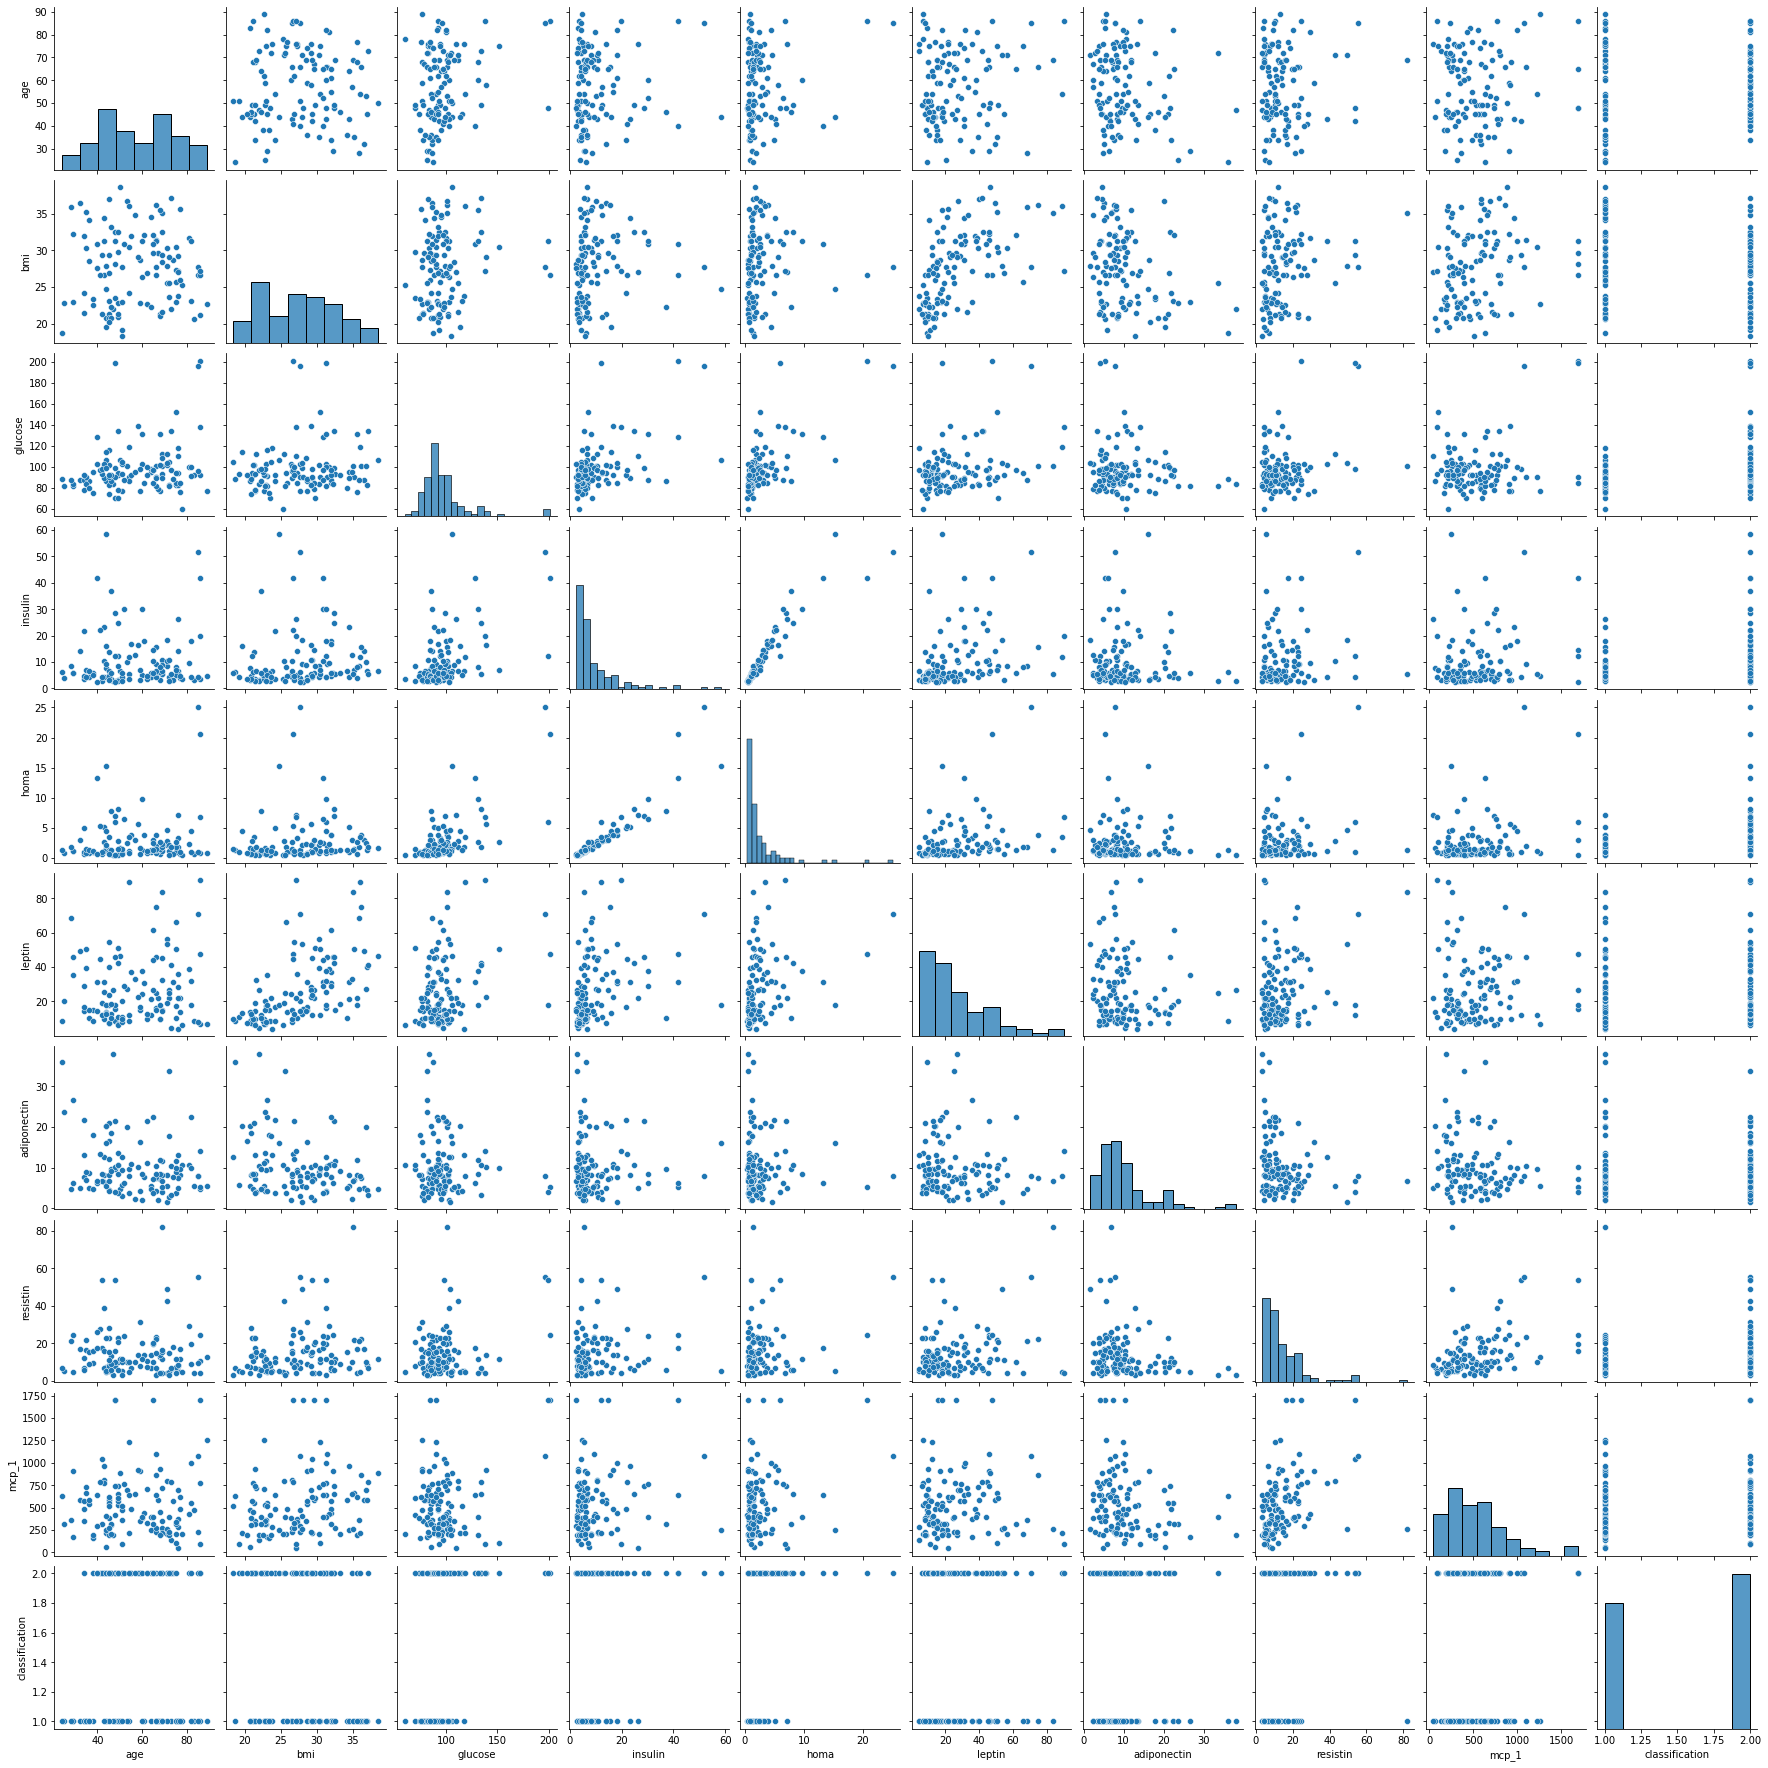

In [7]:
## check paireplot
sns.pairplot(df)

In [8]:
df["classification"].value_counts()

2    64
1    52
Name: classification, dtype: int64

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

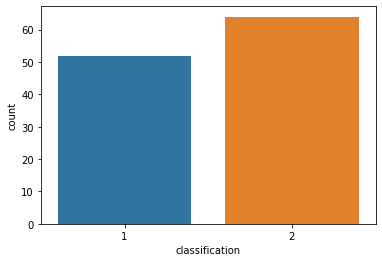

In [9]:
sns.countplot(df["classification"])

In [10]:
df.shape

(116, 10)

In [11]:
df.describe()

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


<AxesSubplot:>

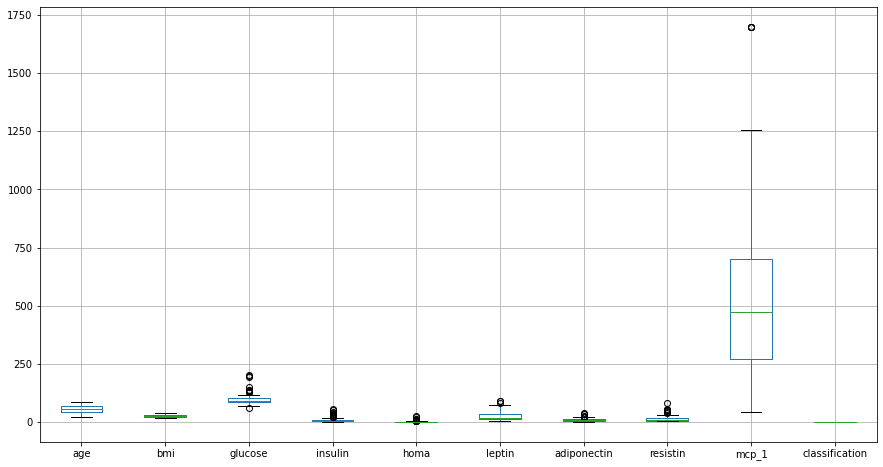

In [15]:
plt.figure(figsize=(15,8))
df.boxplot()

In [16]:
x = df.drop("classification", axis=1)
y = df["classification"]

In [17]:
x

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: classification, Length: 116, dtype: int64

In [19]:
## Split the data into tarining and testing 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=11)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((87, 9), (29, 9), (87,), (29,))

In [36]:
x_train

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1
106,45,29.384757,90,4.713,1.046286,23.8479,6.644245,15.55625,621.273
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444
49,85,26.600000,96,4.462,1.056602,7.8500,7.931700,9.61350,232.006
20,36,28.576676,86,4.345,0.921719,15.1248,8.600000,9.15390,534.224
100,74,28.650138,88,3.012,0.653805,31.1233,7.652220,18.35574,572.401
...,...,...,...,...,...,...,...,...,...
81,81,31.640368,100,9.669,2.385020,38.8066,10.636525,29.55830,426.175
91,82,31.217482,100,18.077,4.458993,31.6453,9.923650,19.94687,994.316
80,59,28.672626,77,3.188,0.605507,17.0220,16.440480,31.69040,910.489
63,51,22.892820,103,2.740,0.696143,8.0163,9.349775,11.55492,359.232


In [28]:
x_test

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302
94,60,31.231410,131,30.130,9.736007,37.8430,8.404430,11.50005,396.021
90,40,30.836531,128,41.894,13.227332,31.0385,6.160995,17.55503,638.261
54,49,20.956607,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
30,66,36.212279,101,15.533,3.869788,74.7069,7.539550,22.32024,864.968
93,49,32.461911,134,24.887,8.225983,42.3914,10.793940,5.76800,656.393
29,36,34.174890,80,6.590,1.300427,10.2809,5.065915,15.72187,581.313
97,40,27.636054,103,2.432,0.617890,14.3224,6.783870,26.01360,293.123
103,72,29.136316,83,10.949,2.241625,26.8081,2.784910,14.76966,232.018


## Model Evoluation

In [20]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred_train = model.predict(x_train)
acc = accuracy_score(y_train, y_pred_train)
print("The Accuracy score is == ", acc)
cm = confusion_matrix(y_train, y_pred_train)
print("The confusion matrix is == ", cm)
clf = classification_report(y_train, y_pred_train)
print("The classification report is == ", clf)

The Accuracy score is ==  0.7471264367816092
The confusion matrix is ==  [[23 12]
 [10 42]]
The classification report is ==                precision    recall  f1-score   support

           1       0.70      0.66      0.68        35
           2       0.78      0.81      0.79        52

    accuracy                           0.75        87
   macro avg       0.74      0.73      0.73        87
weighted avg       0.75      0.75      0.75        87



In [22]:
y_pred_test = model.predict(x_test)
acc = accuracy_score(y_test, y_pred_test)
print("The Accuracy score is == ", acc)
cm = confusion_matrix(y_test, y_pred_test)
print("The confusion matrix is == ", cm)
clf = classification_report(y_test, y_pred_test)
print("The classification report is == ", clf)

The Accuracy score is ==  0.7931034482758621
The confusion matrix is ==  [[14  3]
 [ 3  9]]
The classification report is ==                precision    recall  f1-score   support

           1       0.82      0.82      0.82        17
           2       0.75      0.75      0.75        12

    accuracy                           0.79        29
   macro avg       0.79      0.79      0.79        29
weighted avg       0.79      0.79      0.79        29



## User define function

In [27]:
user_data = x_test.iloc[1][::]
result = model.predict([user_data])
print(result)

[2]


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
user_data = x_test.iloc[0][::]
result = model.predict([user_data])
print(result)

[1]


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
import pickle

In [41]:
with open("model.pkl", "wb")as file:
    pickle.dump(model,file)